In [57]:
#ドライブのマウント
from google.colab import drive
drive.mount('/content/googledrive/')

Mounted at /content/googledrive/


In [58]:
%cd ./googledrive/MyDrive/機械学習特論/

/content/googledrive/MyDrive/機械学習特論


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロードしてデータフレームを作成
def load_iris_data():
    data = load_iris()
    x = pd.DataFrame(data["data"],columns=data["feature_names"])
    y = pd.DataFrame(data["target"],columns=["target"])
    return x, y

# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
def load_mnist_data():
    data = fetch_openml('mnist_784', version=1)
    _x = np.array(data['data'].astype(np.float32))
    _y = np.array(data['target'].astype(np.int32))
    _, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1, stratify=_y)
    return x, y

# Fashion-MNISTデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
def load_fashion_mnist_data():
    data = fetch_openml('Fashion-MNIST')
    _x = np.array(data['data'].astype(np.float32))
    _y = np.array(data['target'].astype(np.int32))
    _, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1, stratify=_y)
    return x, y

In [ ]:
#モデルの学習と評価
def estimate_params(model,data):
  x, y = data
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, stratify=y) # 検証用データに25%を割当て
  print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

  clf = model.fit(x_train, np.array(y_train).ravel())

  predict_train = clf.predict(x_train)
  train_score = metrics.accuracy_score(y_train, predict_train)
  predict_test = clf.predict(x_test)
  test_score = metrics.accuracy_score(y_test, predict_test)

  #train,test双方に対してのスコアを返す
  return train_score,test_score

In [5]:
#MNIST,Fashion-MNISTのデータを格納
dataset = {'mnist': load_mnist_data(), 'fashion-mnist': load_fashion_mnist_data()}
seed=1234

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
def try_depth(model,data,depth):
  #n_estimatorsは固定
  est=80
  #木の深さの最適化パラメータを探す
  test_score=[]
  train_score=[]
  #model==0:AdaBoost
  if model==0:
    for d in depth:
      print(f'--------depth={d}--------')
      ada_model=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=d, random_state=seed), # ベースモデルを指定
                            n_estimators=est, # 木の数
                            random_state=seed)# 乱数シード
      #スコアをtrain,test求めてリストに追加
      for score,result in zip([test_score,train_score],estimate_params(ada_model,data)):
        score.append(result)
  #model==1:Gradient Boost
  if model ==1:
    for d in depth:
      print(f'--------depth={d}--------')
      gb_model=GradientBoostingClassifier(max_depth=d, # 木の深さの最大
                          n_estimators=est, # 木の数
                          random_state=seed) # 乱数シード
      #スコアをtrain,test求めてリストに追加
      for score,result in zip([test_score,train_score],estimate_params(gb_model,data)):
        score.append(result)

  print('----------Finished---------')
  #numpy arrayに変換して、データフレームにするための準備として転置してスコアを返す
  score=np.array([train_score,test_score])
  score=score.transpose(1, 0)
  return score

def try_n_estimators(model,data,est):
  #depthは固定
  depth=3
  #木の深さの最適化
  test_score=[]
  train_score=[]
  #model==0:AdaBoost
  if model==0:
    for e in est:
      print(f'--------n_estimators={e}--------')
      ada_model=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=depth, random_state=seed), # ベースモデルを指定
                            n_estimators=e, # 木の数
                            random_state=seed)# 乱数シード
      #スコアをtrain,test求めてリストに追加
      for score,result in zip([test_score,train_score],estimate_params(ada_model,data)):
        score.append(result)
  #model==1:Gradient Boost
  if model==1:
    for e in est:
      print(f'--------n_estimators={e}--------')
      gb_model=GradientBoostingClassifier(max_depth=depth, # 木の深さの最大
                          n_estimators=e, # 木の数
                          random_state=seed) # 乱数シード
      #スコアをtrain,test求めてリストに追加
      for score,result in zip([test_score,train_score],estimate_params(gb_model,data)):
        score.append(result)

  print('----------Finished---------')
  #numpy arrayに変換して、データフレームにするための準備として転置してスコアを返す
  score=np.array([train_score,test_score])
  score=score.transpose(1, 0)
  return score

In [ ]:
#探索範囲
depth=range(1,9)
est=range(80,140)

#MNIST Ada Boost Params

##depth

In [ ]:
score=try_depth(0,dataset['mnist'],depth)
#DataFrameに
df=pd.DataFrame(score,columns=['train score','test score'])
#パラメータとスコアをプロット
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('MNIST GB Depth',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
#csvとして保存
df.to_csv('mnist_ada_depth.csv')

##n_estimators

In [ ]:
score=try_n_estimators(1,dataset['mnist'],est)
#DataFrameに
df=pd.DataFrame(score,columns=['train score','test score'])
#パラメータとスコアをプロット
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('MNIST GB n_estimators',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
#csvとして保存
df.to_csv('mnist_ada_n_estimators.csv')

#MNIST Gradient Boost Params

##depth

In [ ]:
score=try_depth(1,dataset['mnist'],depth)
#DataFrameに
df=pd.DataFrame(score,columns=['train score','test score'])
#パラメータとスコアをプロット
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('MNIST GB Depth',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
#csvとして保存
df.to_csv('mnist_GB_depth.csv')

##n_estimators

In [ ]:
score=try_n_estimators(1,dataset['mnist'],est)
#DataFrameに
df=pd.DataFrame(score,columns=['train score','test score'])
#パラメータとスコアをプロット
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('MNIST GB n_estimators',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
#csvとして保存
df.to_csv('mnist_GB_n_estimators.csv')

#Fashion-MNIST Ada Boost Params

##depth

In [ ]:
score=try_depth(1,dataset['fashion-mnist'],depth)
#DataFrameに
df=pd.DataFrame(score,columns=['train score','test score'])
#パラメータとスコアをプロット
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('Fashion-MNIST Ada Depth',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
#csvとして保存
df.to_csv('fmnist_ada_depth.csv')

##n_estimators

In [ ]:
score=try_n_estimators(1,dataset['fashion-mnist'],est)
#DataFrameに
df=pd.DataFrame(score,columns=['train score','test score'])
#パラメータとスコアをプロット
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('Fashion-MNIST Ada n_estimators',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
#csvとして保存
df.to_csv('fmnist_ada_n_estimators.csv')

#Fashion-MNIST Gradient Boost Params

##depth

In [ ]:
score=try_depth(1,dataset['fashion-mnist'],depth)
#DataFrameに
df=pd.DataFrame(score,columns=['train score','test score'])
#パラメータとスコアをプロット
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('Fashion-MNIST GB Depth',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
#csvとして保存
df.to_csv('fmnist_gb_depth.csv')

##n_estimators

In [ ]:
score=try_n_estimators(1,dataset['fashion-mnist'],est)
#DataFrameに
df=pd.DataFrame(score,columns=['train score','test score'])
#パラメータとスコアをプロット
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('Fashion-MNIST Ada n_estimators',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
#csvとして保存
df.to_csv('fmnist_ada_n_estimators.csv')

#Best Params

In [6]:
depth=7
est=140

##MNIST

In [7]:
x, y = dataset['mnist']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, stratify=y) # 検証用データに25%を割当て

In [ ]:
# svm (kernel="rbf", C=1) のモデル
model_svm=svm.SVC(kernel="rbf", C=1, max_iter=100000, verbose=True, random_state=1)
model_svm = model_svm.fit(x_train, np.array(y_train).ravel())
predict_train_svm = model_svm.predict(x_train)
predict_test_svm = model_svm.predict(x_test)
#Ada Boost(max_depth=7,n_estimators=140)
ada_model=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=depth, random_state=seed), # ベースモデルを指定
                            n_estimators=est, # 木の数
                            random_state=seed)# 乱数シード
ada_model = ada_model.fit(x_train, np.array(y_train).ravel())
predict_train_ada = ada_model.predict(x_train)
predict_test_ada = ada_model.predict(x_test)
#Gradient Boost(max_depth=7,n_estimators=140)
gb_model=GradientBoostingClassifier(max_depth=depth, # 木の深さの最大
                          n_estimators=est, # 木の数
                          random_state=seed) # 乱数シード
gb_model = gb_model.fit(x_train, np.array(y_train).ravel())
predict_train_gb = gb_model.predict(x_train)
predict_test_gb = gb_model.predict(x_test)

In [36]:
#各モデルのtest,train予測値をデータフレームに
df_train=pd.DataFrame(np.array([predict_train_svm,predict_train_ada,predict_train_gb]).transpose(1,0),columns=['svm','ada','gb'])
df_test=pd.DataFrame(np.array([predict_test_svm,predict_test_ada,predict_test_gb]).transpose(1,0),columns=['svm','ada','gb'])

In [44]:
df_train=df_train.mode(axis=1)
df_test=df_test.mode(axis=1)

,0,1,2
0,3.0,NaN,NaN
1,5.0,NaN,NaN
2,7.0,NaN,NaN
3,5.0,NaN,NaN
4,2.0,NaN,NaN
...,...,...,...
1745,9.0,NaN,NaN
1746,3.0,NaN,NaN
1747,9.0,NaN,NaN
1748,8.0,NaN,NaN


In [46]:
train_score = metrics.accuracy_score(y_train, df_train.values)
print('-----train score-----')
train_score

-----train score-----


0.9996190476190476

In [47]:
test_score = metrics.accuracy_score(y_test, df_test[0].values)
print('-----test score-----')
test_score

-----test score-----


0.94

#Fashion MNIST

In [48]:
x, y = dataset['fashion-mnist']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, stratify=y) # 検証用データに25%を割当て

In [49]:
# svm (kernel="rbf", C=1) のモデル
model_svm=svm.SVC(kernel="rbf", C=1, max_iter=100000, verbose=True, random_state=1)
model_svm = model_svm.fit(x_train, np.array(y_train).ravel())
predict_train_svm = model_svm.predict(x_train)
predict_test_svm = model_svm.predict(x_test)
#Ada Boost(max_depth=7,n_estimators=140)
ada_model=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=depth, random_state=seed), # ベースモデルを指定
                            n_estimators=est, # 木の数
                            random_state=seed)# 乱数シード
ada_model = ada_model.fit(x_train, np.array(y_train).ravel())
predict_train_ada = ada_model.predict(x_train)
predict_test_ada = ada_model.predict(x_test)
gb_model=GradientBoostingClassifier(max_depth=depth, # 木の深さの最大
                          n_estimators=est, # 木の数
                          random_state=seed) # 乱数シード
#Gradient Boost(max_depth=7,n_estimators=140)
gb_model = gb_model.fit(x_train, np.array(y_train).ravel())
predict_train_gb = gb_model.predict(x_train)
predict_test_gb = gb_model.predict(x_test)

#各モデルのtest,train予測値をデータフレームに
df_train=pd.DataFrame(np.array([predict_train_svm,predict_train_ada,predict_train_gb]).transpose(1,0),columns=['svm','ada','gb'])
df_test=pd.DataFrame(np.array([predict_test_svm,predict_test_ada,predict_test_gb]).transpose(1,0),columns=['svm','ada','gb'])

df_train=df_train.mode(axis=1)
df_test=df_test.mode(axis=1)

[LibSVM]

In [52]:
df_train

,0,1,2
0,5.0,NaN,NaN
1,5.0,NaN,NaN
2,5.0,NaN,NaN
3,4.0,NaN,NaN
4,9.0,NaN,NaN
...,...,...,...
5245,7.0,NaN,NaN
5246,6.0,NaN,NaN
5247,8.0,NaN,NaN
5248,5.0,NaN,NaN


In [53]:
train_score = metrics.accuracy_score(y_train, df_train[0].values)
print('-----train score-----')
train_score

-----train score-----


0.9923809523809524

In [54]:
test_score = metrics.accuracy_score(y_test, df_test[0].values)
print('-----test score-----')
test_score

-----test score-----


0.84

#MNISTデータセットのパラメータとスコアの関係

In [66]:
#depth=1~30,n_estimators=20~150
est=range(20,150)
depth=range(1,30)

In [68]:
df=pd.read_csv('mnist_depth.csv')

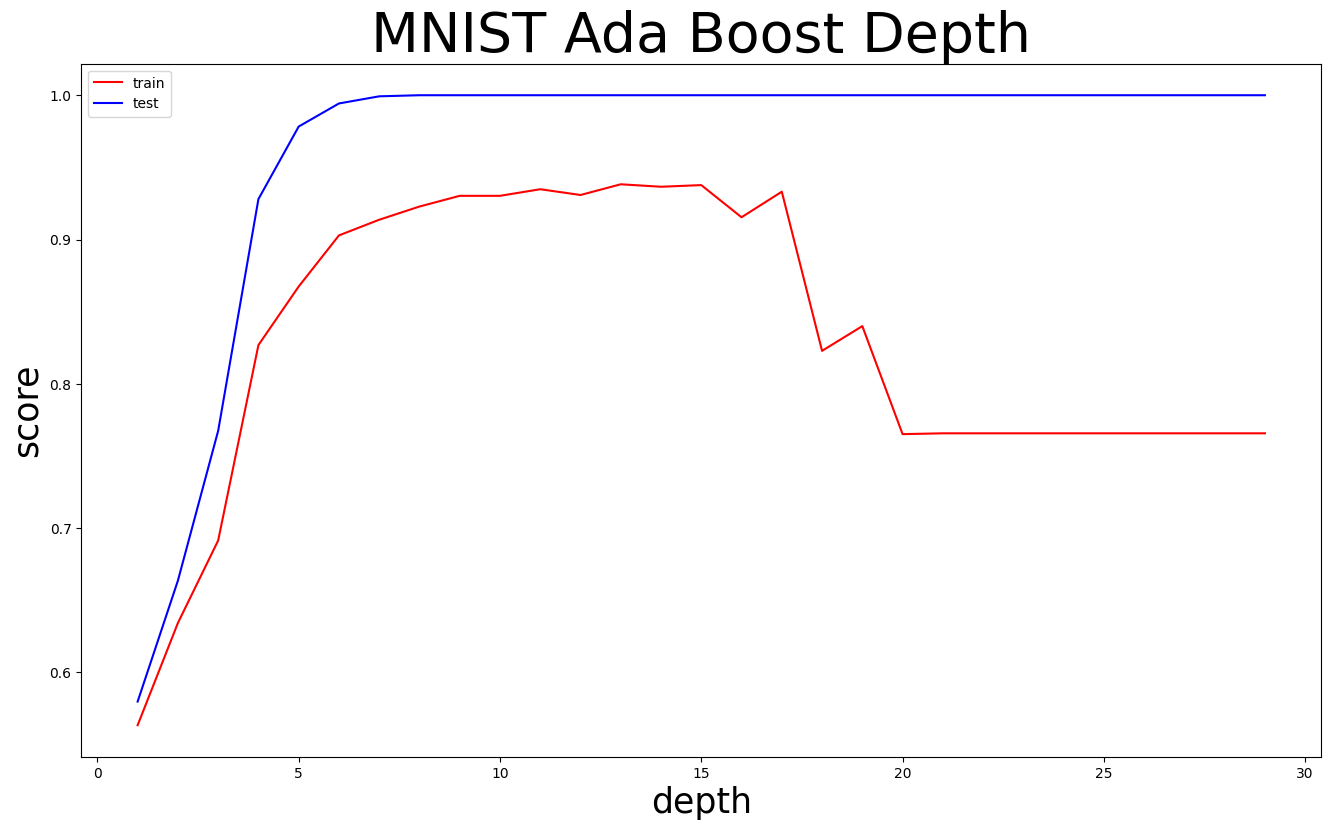

In [70]:
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('MNIST Ada Boost Depth',fontsize=40)
ax.plot(depth,df['train score'],color='r',label='train')
ax.plot(depth,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
plt.savefig('mnist_ada_depth.png')

In [71]:
df=pd.read_csv('mnist_estimate_n.csv')

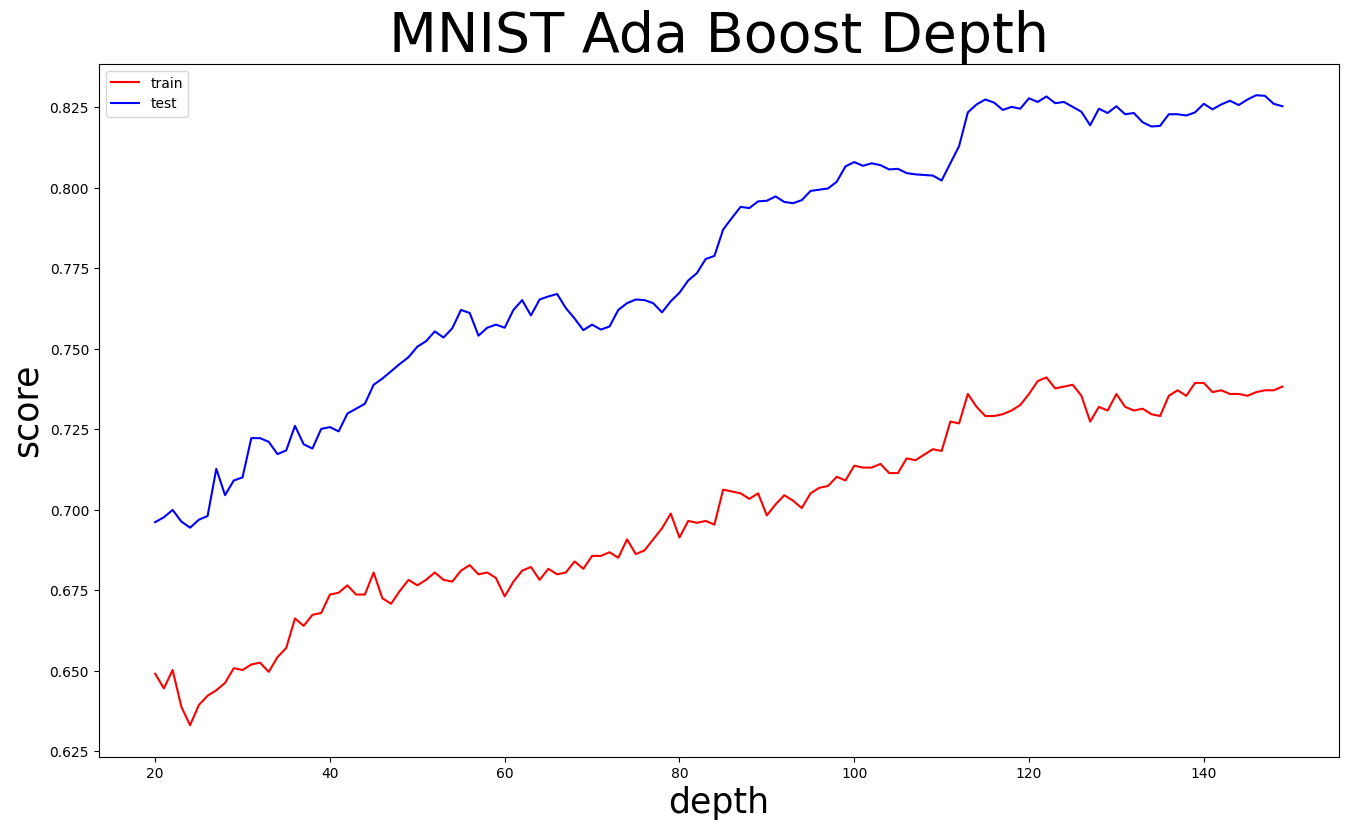

In [72]:
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.set_title('MNIST Ada Boost Depth',fontsize=40)
ax.plot(est,df['train score'],color='r',label='train')
ax.plot(est,df['test score'],color='b',label='test')
ax.set_xlabel('depth',fontsize=25)
ax.set_ylabel('score',fontsize=25)
plt.legend()
plt.savefig('mnist_ada_estimators.png')